In [66]:
import numpy as np
import array
import matplotlib.pyplot as plt
#


In [348]:
def binfunc(binfac,x,y):
    if (binfac == 1):
        xbin = x
        ybin = y
        return xbin, ybin
    else:
        n1 = len(x)
        nb = np.int(n1/binfac)
        xmin = np.min(x)
        xmax = np.max(x)
        bins = np.linspace(xmin,xmax,nb)
        dig = np.digitize(x,bins)
        #y = y+1.e-99
        ybin = [np.exp(np.log(y[dig==i]).mean()) for i in range (1,len(bins))]
        xbin = 0.5*(bins[1:]+bins[:-1])
        return xbin, ybin
#
nx = 2**12 #1024 # size of data array
phi0 = 1.e-4
myseed = 444
# binfac = 2**6
np.random.seed(myseed);
phi = phi0*np.random.randn(nx)
kernel = np.zeros(np.shape(phi))
sx = 1.e-2/4.0
sigsq = (sx*np.float(nx))**2
for ix in range(nx):
    kernel[ix]=np.exp(-0.5*(ix)**2/sigsq)
phism = np.real(np.fft.ifft( np.fft.fft(phi)*kernel ))
phism = phism - np.mean(phism)
np.savetxt("real_phi.txt",phism)
spec = np.abs(np.fft.fft(phism))**2
freqs = np.fft.fftfreq(len(phism))

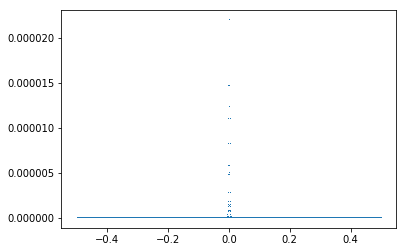

In [351]:
x=np.arange(0,nx,1)
# plt.plot(x,phism,",")
# plt.hist(phi)
# plt.hist(phism)

# plt.plot(freqs, np.fft.fft(phi),",")
# plt.plot(freqs, np.abs(kernel),",")
# plt.plot(freqs, np.abs(np.fft.fft(phi)*kernel),",")

# phi = phi - np.mean(phi)
# phik=np.abs(np.fft.fft(phi))**2
plt.plot(freqs,spec,",")
# plt.hist(phism)
plt.show()
# np.fft.fft(phi);


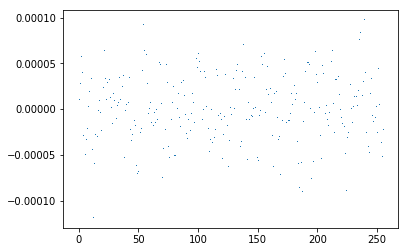

In [313]:
x=np.arange(0,nx,1)
# plt.plot(x,phi,"-")
plt.plot(x,phism,",")

plt.show()

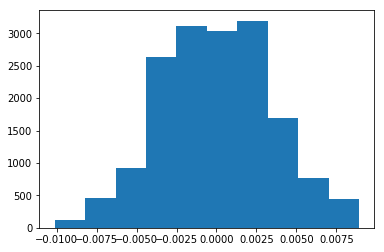

In [253]:
plt.hist(phism)
plt.show()

In [ ]:
def binfunc(binfac,x,y):
    if (binfac == 1):
        xbin = x
        ybin = y
        return xbin, ybin
    else:
        n1 = len(x)
        nb = np.int(n1/binfac)
        xmin = np.min(x)
        xmax = np.max(x)
        bins = np.linspace(xmin,xmax,nb)
        dig = np.digitize(x,bins)
        #y = y+1.e-99
        ybin = [np.exp(np.log(y[dig==i]).mean()) for i in range (1,len(bins))]
        xbin = 0.5*(bins[1:]+bins[:-1])
        return xbin, ybin
#
nx = 2**16 #1024 # size of data array
phi0 = 1.e-4
myseed = 444
binfac = 2**6
#
f1=open('./output.txt', 'w')
f2=open('./spectrum_pi.txt', 'w')
f3=open('./spectrum_zeta.txt', 'w')
f4=open('./spectrum_phi.txt', 'w')
#
np.random.seed(seed=myseed)
phi = phi0*np.random.randn(nx)
kernel = np.zeros(np.shape(phi))
sx = 1.e-2/4.0
sigsq = (sx*np.float(nx))**2
for ix in range(nx):
    kernel[ix]=np.exp(-0.5*np.float(ix)**2/sigsq)
phism = np.real(np.fft.ifft( np.fft.fft(phi)*kernel ))
phism = phism - np.mean(phism)
np.savetxt("real_phi.txt",phism)
spec = np.abs(np.fft.fft(phism))**2
freqs = np.fft.fftfreq(len(phism))
#f3.write(" ".join(map(str,freqs)))
#f3.write("\n")
#f3.write(" ".join(map(str,spec)))
#f3.write("\n")
xbin, ybin = binfunc(binfac,freqs,spec)
f4.write(" ".join(map(str,xbin)))
f4.write("\n")
f4.write(" ".join(map(str,ybin)))
f4.write("\n")
#
pi   = np.zeros(nx)
zeta = np.zeros(nx)
tauin = 0.0
dt    = 1.e-3
tauend = 1000.0 #100.0
cs2 = 1.e-3
al  = 1.0 #10000.0
dx  = 1.0
#
#
tau = tauin